# Dynamics Research for Tech Cluster in UK

## Question

1. For entry pattern, how to pick incorperation year? (Like 1950-2018) 

    Looking up for literature to find supporting evidence? (Like Apple were found in 1970s)?
    
A: For the whole UK, a **20-year** time series feels sensible, say **1998-2018**. As you suggest, in the dissertation you will want to justify this with references to the cluster literature: try looking for studies on **cluster evolution**.

2. How to do map making for entry/exit/churn pattern?

    churn pattern may be similar to the entry pattern because dissolution date is a small number in dataset(fame_OC)
    
A: 
    
3. How to define the number of all companies in  entry rate measurement?
    
    Does it represent the number of tech companies in a specific cluster from 19xx to 2018?
    
A:
    
4. Which regression method I should pick up (multiple regression?)

    D/ Regression analysis - I would suggest trying two things to start. 
    Again, for cluster i, year t:

    $Dynamics_variable_it = F(#firms_it-n, industry mix_it-n, X_it-n, location_i, year_t)$ (1)

    $Firm_performance_it = F(#firms_it-n, dynamics_it-n industry mix_it-n, X_it-n, location_i, year_t)$ (2)

    Attributes Question:
    
    - firms_it-n : the number of tech firms in year $t$  and cluster $i$
    - industry mix_it-n : ?
    - X_it-n: ?
    - location_i: tech cluster $i$
    - year_t: tech firm incorperation year $t$

A:

## 1 Key Results

### 1.1 Tech Cluster Identifying

According to the previous EDA: https://zeqiang.fun/CASA0012-Dissertation/jupyterlab/EDA.html

The top 10 tech cluster can be divided by TTWA (Travel to Work Area). You can see the bar chart below

The key finding of bar chart:

1. The top 1 tech cluster has the most number of tech firms, which is as multiple times as that of other clusters.
1. The statistics of Manchester and Slough&Heathrow are greated than 20,000

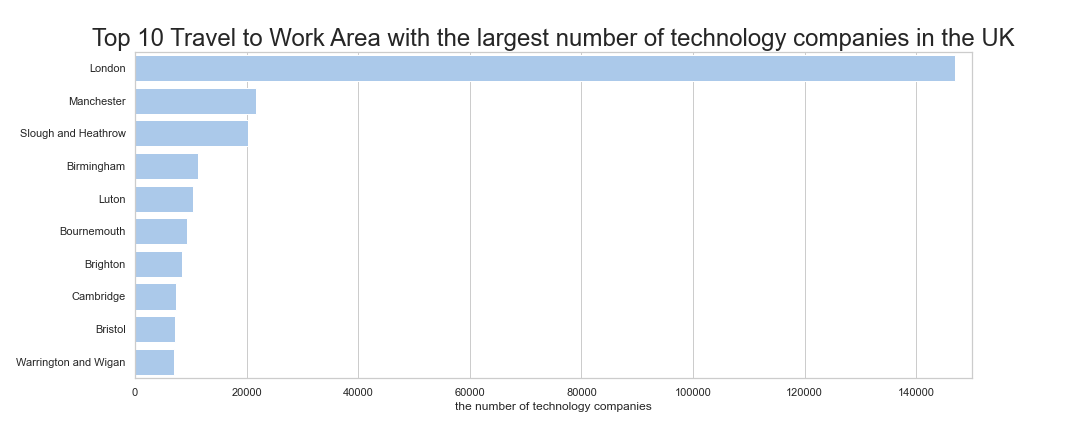

The map of top 10 tech clusters based on ttwa boundaries can be found below. The blue area are non-top-10-tech-clusters. 

The key finding of map:

1. Most tech clusters are located in the south of UK (England & Wales)
1. The number of tech firms sorrounding London tech cluster is the most (the pink and dark brown area)

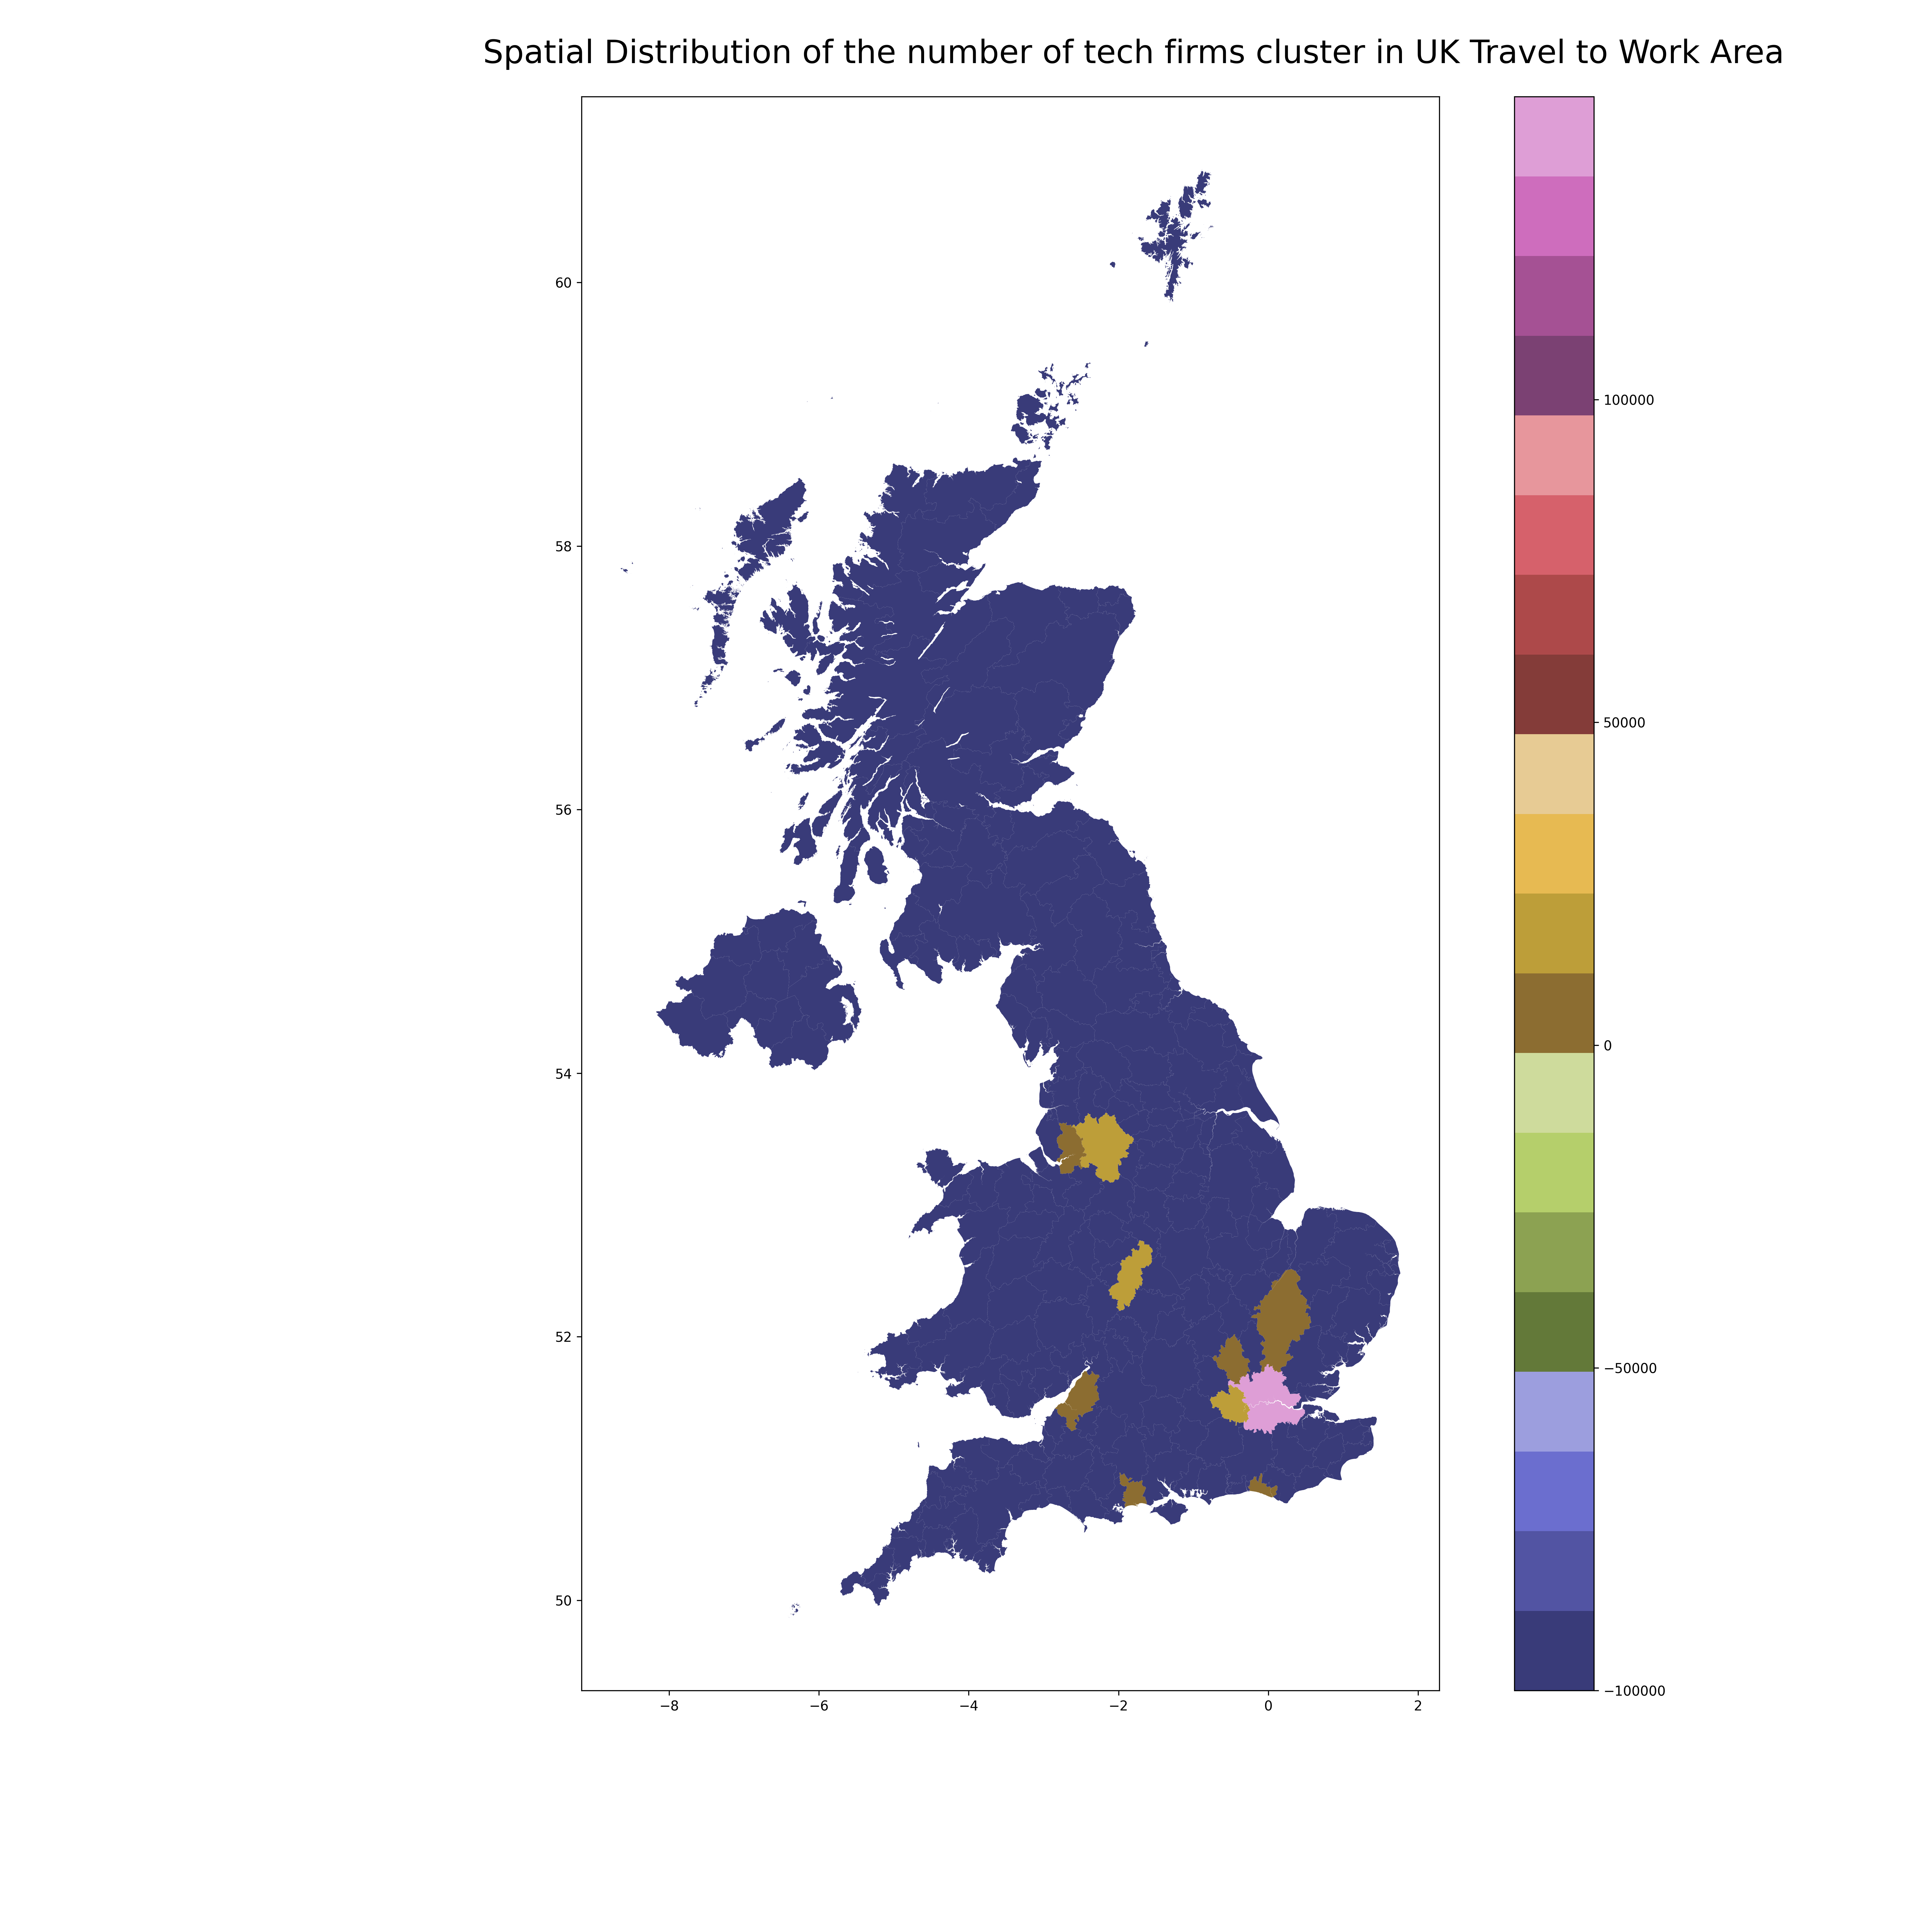

### 1.2 Entry Pattern

The dataset of entry rate for 10 tech clusters from 1900 to 2018 can be found below

In [50]:
entry_rate.style

The simple linear regression for London tech cluster is operated

In [51]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     60.20
Date:                Sun, 18 Jul 2021   Prob (F-statistic):           2.63e-07
Time:                        20:03:51   Log-Likelihood:                 48.708
No. Observations:                  21   AIC:                            -93.42
Df Residuals:                      19   BIC:                            -91.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0223      0.011     -2.118      0.048      -0.044      -0.000
x1             0.0070      0.001      7.759      0.000       0.005       0.009
==============================================================================
Omnibus:                       17.473   Durbin-Watson:                   0.531
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.580
Skew:                           1.646   Prob(JB):                     5.60e-05
Kurtosis:                       6.397   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As shown above, the regression performance is not good. The exit rate and churn rate will be considered as variables in next multiple regression.

The research plan in the next week:

1. Multiple regression for entry/exit/churn pattern
2. EDA for LQs 
3. Lit Review

---

## 2 Reproduciable Analysis

### 2.1 Read Data & Preprocessing

In [2]:
import pandas as pd
import sys
PATH = sys.path[0] # set the local file path

df = pd.read_csv(PATH + "/Dataset/fame_OC_tech_firm.csv")
# preprocess the data
df = df.drop({"Unnamed: 0","Unnamed: 0.1","Unnamed: 0.1.1","is_tech"},axis = 1)
df.head()

/Users/fangzeqiang/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,28,41,66) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


registered_number incorporation_date dissolution_date  latest_accounts_cash  \
0          06199872         2007-04-02              NaN                   NaN   
1          11896710                NaN              NaN                   NaN   
2          SC041753         1965-02-19              NaN                   NaN   
3          12125173                NaN              NaN                   NaN   
4          11968595                NaN              NaN                   NaN   

   latest_accounts_assets  latest_accounts_liabilities  year_obs  sic_year  \
0                 15785.0                          NaN      2017    2007.0   
1                     NaN                          NaN      2018       NaN   
2                     NaN                          NaN      2018    2007.0   
3                     NaN                          NaN      2018       NaN   
4                     NaN                          NaN      2018       NaN   

     sic4  change_sic  ...  pcd2 pcds  cty laua ctry  rgn  ttwa  pct lep1 lep2  
0  8622.0         0.0  ...   NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN  
1     NaN         NaN  ...   NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN  
2  2013.0         0.0  ...   NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN  
3     NaN         NaN  ...   NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN  
4     NaN         NaN  ...   NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN  

[5 rows x 64 columns]

According to previous [EDA research](https://zeqiang.fun/CASA0012-Dissertation/jupyterlab/EDA.html), there are **88803** missing values in `birth_year` and `incorperation_date` columns, accounting for about **17%** in the dataset.

In [3]:
# drop the null value record in birth year and ttwa(travel to work area) columns
df_1 = df.dropna(subset = {"birth_year","ttwa"})

In [4]:
print("There are "+ str(df_1.shape[0]/df.shape[0] * 100) + "% value remain \n")

There are 82.46591448838639% value remain 



### 2.2 EDA for Birth Year

In [5]:
# count the value
df_1.birth_year.value_counts()

2018.0    66154
2017.0    42583
2015.0    40174
2016.0    39836
2014.0    35894
          ...  
1879.0        1
1881.0        1
1885.0        1
1887.0        1
1866.0        1
Name: birth_year, Length: 140, dtype: int64

In [6]:
# Tranform data type
df_birth_year = pd.DataFrame(df_1.birth_year.value_counts()).reset_index()
df_birth_year.rename({"index":"birth_year","birth_year":"count"},axis=1,inplace=True)
df_birth_year[df_birth_year["count"]>10]

birth_year  count
0       2018.0  66154
1       2017.0  42583
2       2015.0  40174
3       2016.0  39836
4       2014.0  35894
..         ...    ...
89      1925.0     13
90      1942.0     13
91      1924.0     13
92      1923.0     12
93      1909.0     11

[94 rows x 2 columns]

### 2.3 Data Preparation: 10 Tech Clusters Identifying

According to the previous EDA: https://zeqiang.fun/CASA0012-Dissertation/jupyterlab/EDA.html

The top 10 tech cluster can be divided by TTWA (Travel to Work Area). You can see the bar chart below

The key finding of bar chart:

1. The top 1 tech cluster has the most number of tech firms, which is as multiple times as that of other clusters.
1. The statistics of Manchester and Slough&Heathrow are greated than 20,000

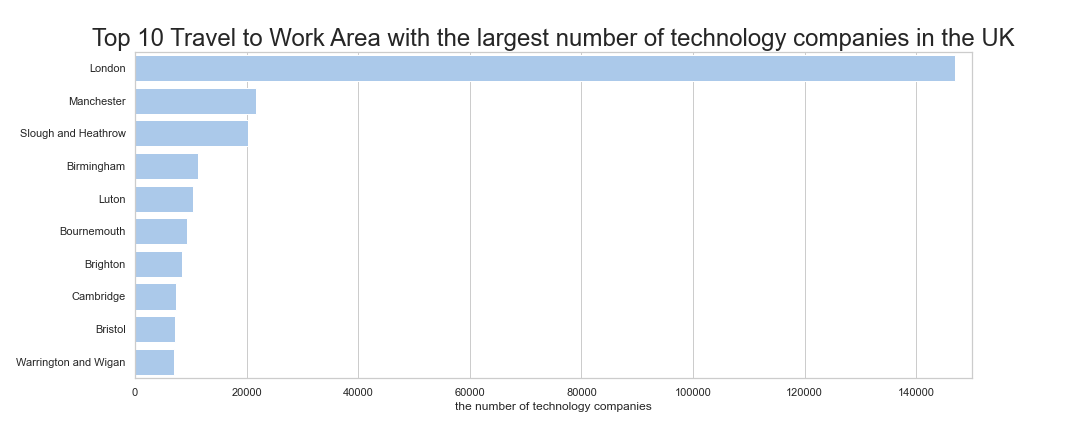

The map of top 10 tech clusters based on ttwa boundaries can be found below. The blue area are non-top-10-tech-clusters. 

The key finding of map:

1. Most tech clusters are located in the south of UK (England & Wales)
1. The number of tech firms sorrounding London tech cluster is the most (the pink and dark brown area)

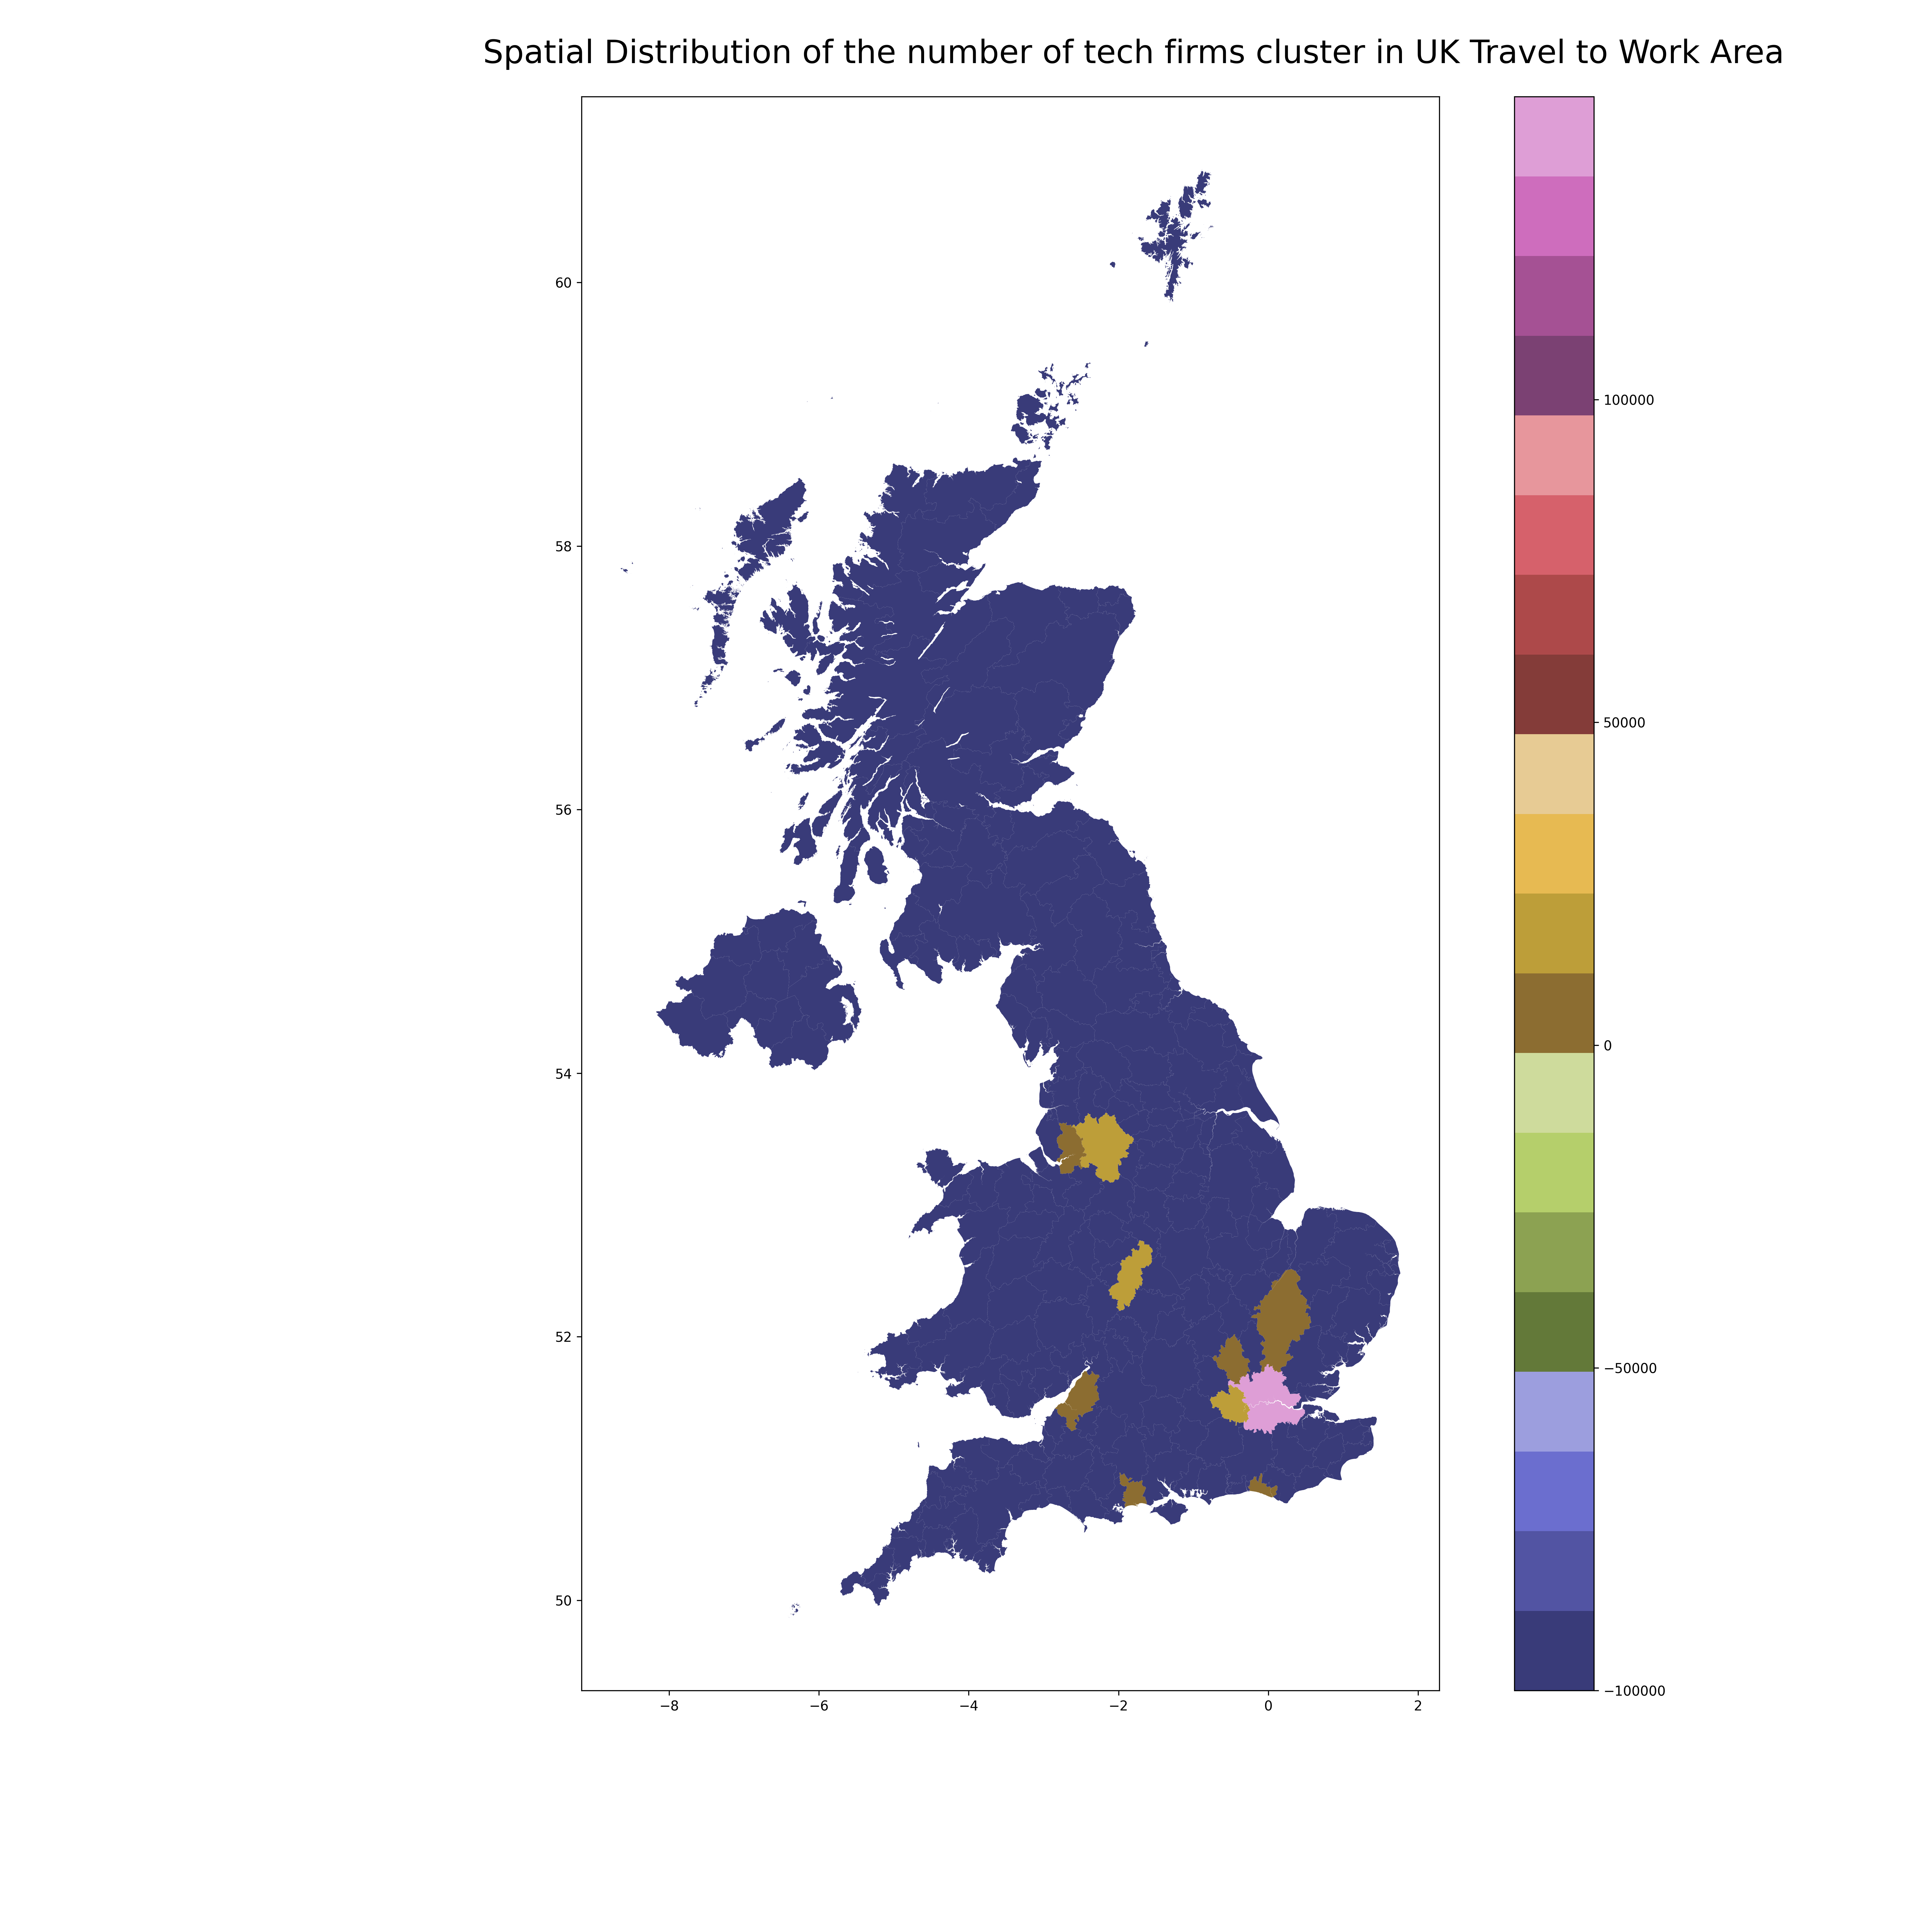

### 2.4 Methodology Design: Measuring Dynamics

- Entry rate for tech cluster i, year t = firms incorporated_t / all firms_it

    $Entry\ Rate_{i,t} = \frac{incorporating\ firms}{all\ companies}$
    
    Where $i$ means the tech cluster, $t$ means the tech incorporate year 2009, 2014,..., 2020
    
- Exit rate = firms dissolved_t / all firms_it
    
    $Exit\ Rate_{i,t} = \frac{disolution\ firms}{all\ companies}$
   
   
- Churn rate = (firms incorporated - firms dissolved)_t / all firms_it

    $Churn\ Rate_{i,t} = \frac{incorporation\ firms\ -\ disolution\ firms}{all\ companies}$
    
    *this index may be quite similar to the first one because there is a few number


You could also try fitting these in first differences, e.g. change in entry / exit / churn between **t and t-1**.

### 2.5 Entry Rate Research

The entry rate can reflect the level of tech cluster attraction, the measurement method is given below:

$Entry\ Rate_{i,t} = \frac{incorporating\ firms}{all\ companies}$
    
Where $i$ means the tech cluster, $t$ means the tech incorporate year 2009, 2014,..., 2020

Note: only a few companies(1%, according to previous EDA research) have dissolution dates, the number of all companies includes dissolution ones.

1. The 10 tech clusters will be picked to research the entry rate.
2. If the results are not ideal, more clusters will be added to observe.

#### 2.5.1 Labeling Tech Clusters

Refer to previous EDA:https://zeqiang.fun/CASA0012-Dissertation/jupyterlab/EDA.html

The top 10 cluster based on Travel to Work Area(TTWA) will be concerned as shown below

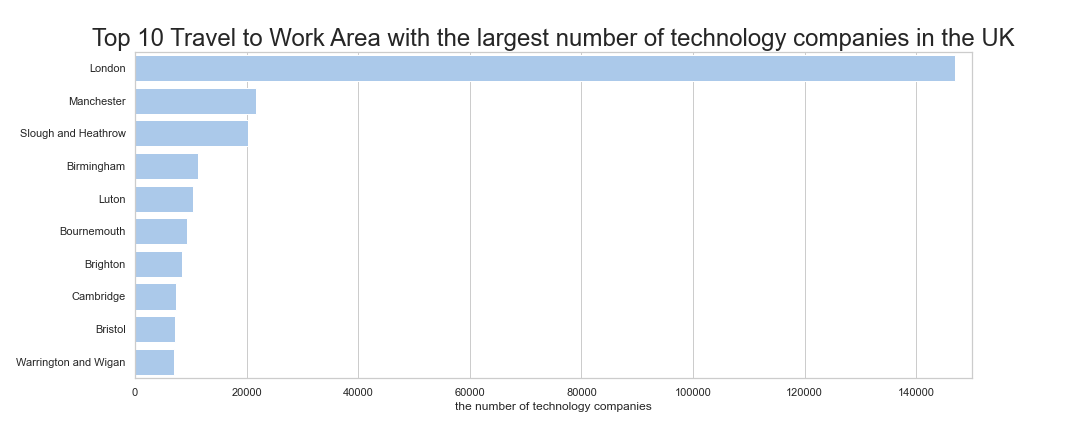

**FAQ**:

    1. Why I choose TTWA?

        This geographical division can better reflect the relationship between population, company and work.

    2. What is TTWA?

        The 228 areas forming the 2011 TTWAs, covering the whole of the UK, were defined in 2015 using 2011 Census commuting flow data, indicating home and workplace address. The TTWAs are based on aggregations of Lower Layer Super Output Areas (LSOA) in England and Wales, Data Zones (DZ) in Scotland, and Super Output Areas (SOA) in Northern Ireland and in some cases span country borders. There are six cross-border TTWAs, 149 in England, 18 in Wales, 45 in Scotland and 10 in Northern Ireland.

If `ttwa` is attributed to `10_tech_clusters`, then new column `cluster_label` will be set to the corresponding one.

In [7]:
# generate the top 10 tech clusters table based on the ttwa
top_10_ttwa = df.ttwa.value_counts().head(10)
top_10_ttwa = pd.DataFrame(top_10_ttwa).reset_index()
top_10_ttwa.columns = ["ttwa_code","counts"]

df_ttwa = pd.read_csv(PATH + "/Dataset/ttwa.csv")
df_ttwa = pd.merge(top_10_ttwa, df_ttwa[["code","name"]], left_on="ttwa_code",right_on="code")
df_ttwa_10 = df_ttwa[["ttwa_code", "name","counts"]]
df_ttwa_10.style

#### 2.5.2 Data Filting

1. Data Filting: remain 10 tech clusters data

    Then the `ttwa` can be considered as the `cluster label`

In [8]:
# df_10_tc means df_10_tech_clusters
df_10_tc = df.copy()
print(df_10_tc.shape)
df_10_tc = df_10_tc[df_10_tc.ttwa.isin(df_ttwa_10.ttwa_code.to_list())]
print(df_10_tc.shape)

(513708, 64)
(249490, 64)


In [9]:
df_10_tc.birth_year.value_counts()

2018.0    36350
2017.0    22303
2016.0    20551
2015.0    20468
2014.0    17832
          ...  
1905.0        1
1906.0        1
1918.0        1
1908.0        1
1877.0        1
Name: birth_year, Length: 129, dtype: int64

2. Data Filting: Pick birth year from 1998 to 2018 (two decades)

    London, UK, from 2009 to 2018. The London technology cluster has occupied the world's leading level in the world venture capital market and start-up unicorn companies. The technology cluster effect has played an important role in this period of time (Kerr & et al., 2020).
    
    The absolute number of patents and the annual growth rate of patents for most of the high tech clusters showed a significant level of improvement between 1990 and 2000. Based on the Hidden Markov model (HMMs) Hidden Markov model classification method, the high-tech industry has rapidly evolved from stage 3 to stage 7 within the 10 years. In this project, selecting the tech firm change data from 1998 to 2018 can better reflect the dynamic change characteristics of the cluster, and can better study the difference between the clusters and the data density is large (Lee & et al.).
    
*Kerr, William R., and Frederic Robert-Nicoud. 2020. "Tech Clusters." Journal of Economic Perspectives, 34 (3): 50-76. https://www.aeaweb.org/articles?id=10.1257/jep.34.3.50*

*Lee, H., Lee, S. and Yoon, B., 2011. Technology clustering based on evolutionary patterns: The case of information and communications technologies. Technological Forecasting and Social Change, 78(6), pp.953-967.*


#### 2.5.3 Pivot Operation (Excel)

Export csv to excel to do pivot operation:

- rows: `ttwa` (`ttwa` there is considered as the tech cluster label)
- columns: `birth_year`
- value: count of `register_number`

Then, calculate the entry number in excel

In [11]:
df_10_tc_clipped = df_10_tc[["registered_number","ttwa","birth_year"]]
df_10_tc_clipped.to_csv(PATH + "/fame_OC_10_tc_clipped.csv")

Import the processed dataset from `.xlsx` file

In [17]:
# read the entry rate dataset from excel file 
sheetName = "entry_rate"
df_entry_excel = pd.read_excel(PATH + "/Excel/fame_OC_10_tc_clipped.xlsx",sheet_name = sheetName)
df_entry_excel.head()

ttwa  Grand Total                                     1998  \
0  E30000169         9047                                   0.0063   
1  E30000175         7368                                   0.0031   
2  E30000179         7327                                   0.0053   
3  E30000180         5818                                   0.0113   
4  E30000186         5774                                   0.0121   

                                      1999  \
0                                   0.0086   
1                                   0.0030   
2                                   0.0050   
3                                   0.0110   
4                                   0.0109   

                                      2000  \
0                                   0.0091   
1                                   0.0046   
2                                   0.0063   
3                                   0.0120   
4                                   0.0152   

                                      2001  \
0                                   0.0074   
1                                   0.0039   
2                                   0.0049   
3                                   0.0112   
4                                   0.0123   

                                      2002  \
0                                   0.0138   
1                                   0.0053   
2                                   0.0097   
3                                   0.0162   
4                                   0.0220   

                                      2003  \
0                                   0.0166   
1                                   0.0065   
2                                   0.0127   
3                                   0.0205   
4                                   0.0253   

                                      2004  \
0                                   0.0160   
1                                   0.0053   
2                                   0.0089   
3                                   0.0179   
4                                   0.0199   

                                      2005  ...  \
0                                   0.0167  ...   
1                                   0.0068  ...   
2                                   0.0121  ...   
3                                   0.0186  ...   
4                                   0.0206  ...   

                                      2009  \
0                                   0.0290   
1                                   0.0179   
2                                   0.0225   
3                                   0.0296   
4                                   0.0289   

                                      2010  \
0                                   0.0417   
1                                   0.0330   
2                                   0.0427   
3                                   0.0413   
4                                   0.0360   

                                      2011  \
0                                   0.0429   
1                                   0.0425   
2                                   0.0572   
3                                   0.0552   
4                                   0.0449   

                                      2012  \
0                                   0.0608   
1                                   0.0512   
2                                   0.0644   
3                                   0.0696   
4                                   0.0540   

                                      2013  \
0                                   0.0793   
1                                   0.0502   
2                                   0.0957   
3                                   0.0737   
4                                   0.0644   

                                      2014  \
0                                   0.0956   
1                                   0.0779   
2                                   0.1100   
3                                   0.0938   
4  

In [18]:
# Preprocess the entry rate dataset
df_entry_rate = df_entry_excel.rename({"ttwa":"tech_cluster","Grand Total":"all_companies"},axis=1)
df_entry_rate.head()

tech_cluster  all_companies                                     1998  \
0    E30000169           9047                                   0.0063   
1    E30000175           7368                                   0.0031   
2    E30000179           7327                                   0.0053   
3    E30000180           5818                                   0.0113   
4    E30000186           5774                                   0.0121   

                                      1999  \
0                                   0.0086   
1                                   0.0030   
2                                   0.0050   
3                                   0.0110   
4                                   0.0109   

                                      2000  \
0                                   0.0091   
1                                   0.0046   
2                                   0.0063   
3                                   0.0120   
4                                   0.0152   

                                      2001  \
0                                   0.0074   
1                                   0.0039   
2                                   0.0049   
3                                   0.0112   
4                                   0.0123   

                                      2002  \
0                                   0.0138   
1                                   0.0053   
2                                   0.0097   
3                                   0.0162   
4                                   0.0220   

                                      2003  \
0                                   0.0166   
1                                   0.0065   
2                                   0.0127   
3                                   0.0205   
4                                   0.0253   

                                      2004  \
0                                   0.0160   
1                                   0.0053   
2                                   0.0089   
3                                   0.0179   
4                                   0.0199   

                                      2005  ...  \
0                                   0.0167  ...   
1                                   0.0068  ...   
2                                   0.0121  ...   
3                                   0.0186  ...   
4                                   0.0206  ...   

                                      2009  \
0                                   0.0290   
1                                   0.0179   
2                                   0.0225   
3                                   0.0296   
4                                   0.0289   

                                      2010  \
0                                   0.0417   
1                                   0.0330   
2                                   0.0427   
3                                   0.0413   
4                                   0.0360   

                                      2011  \
0                                   0.0429   
1                                   0.0425   
2                                   0.0572   
3                                   0.0552   
4                                   0.0449   

                                      2012  \
0                                   0.0608   
1                                   0.0512   
2                                   0.0644   
3                                   0.0696   
4                                   0.0540   

                                      2013  \
0                                   0.0793   
1                                   0.0502   
2                                   0.0957   
3                                   0.0737   
4                                   0.0644   

                                      2014  \
0                                   0.0956   
1                                   0.0779   
2                                   0.1100   
3                  

#### 2.5.4 UK Average Level Entry Rate

Comparing with the bench mark, as Max Nathan saying.

The calculation need `registered_number`, `birth_year`,  `diss_year`

In [70]:
df_UK_ER = df[["registered_number","birth_year","diss_year"]]

# preprocess
df_UK_ER = df_UK_ER.fillna(0)

# drop row whose birth_year is 0
df_UK_ER.drop( index = df_UK_ER.birth_year[df_UK_ER.birth_year == 0].index, inplace = True)

# read table
df_UK_ER

registered_number                               birth_year  \
0               06199872                               2,007.0000   
2               SC041753                               1,965.0000   
5               NI069190                               2,008.0000   
8               02417673                               1,989.0000   
9               10544451                               2,017.0000   
...                  ...                                      ...   
513703          SC566561                               2,017.0000   
513704          SC227775                               2,002.0000   
513705          SC388753                               2,010.0000   
513706          SC567313                               2,017.0000   
513707          SC601989                               2,018.0000   

                                      diss_year  
0                                        0.0000  
2                                        0.0000  
5                                        0.0000  
8                                        0.0000  
9                                        0.0000  
...                                         ...  
513703                                   0.0000  
513704                                   0.0000  
513705                                   0.0000  
513706                                   0.0000  
513707                                   0.0000  

[424905 rows x 3 columns]

In [74]:
# !pip3 install openpyxl
# export to excel
df_UK_ER.to_excel(PATH + "/Excel/fame_OC_UK_ER.xlsx")

In [ ]:
df_UK_ER_excel = pd.read_excel(PATH + "/Excel/fame_OC_UK_ER.xlsx")

#### 2.5.5 Entry Rate Regression (EDA)

Take London cluster as an example.

add ttwa name to the entry rate dataset

In [20]:
entry_rate = pd.merge(df_entry_rate, df_ttwa_10,left_on = "tech_cluster", right_on = "ttwa_code")
entry_rate.drop({"counts"},axis=1,inplace = True)
entry_rate

tech_cluster  all_companies                                     1998  \
0    E30000169           9047                                   0.0063   
1    E30000175           7368                                   0.0031   
2    E30000179           7327                                   0.0053   
3    E30000180           5818                                   0.0113   
4    E30000186           5774                                   0.0121   
5    E30000234         113412                                   0.0068   
6    E30000237           8407                                   0.0086   
7    E30000239          17174                                   0.0097   
8    E30000266          16370                                   0.0084   
9    E30000284           4714                                   0.0072   

                                      1999  \
0                                   0.0086   
1                                   0.0030   
2                                   0.0050   
3                                   0.0110   
4                                   0.0109   
5                                   0.0078   
6                                   0.0090   
7                                   0.0080   
8                                   0.0079   
9                                   0.0070   

                                      2000  \
0                                   0.0091   
1                                   0.0046   
2                                   0.0063   
3                                   0.0120   
4                                   0.0152   
5                                   0.0093   
6                                   0.0063   
7                                   0.0089   
8                                   0.0112   
9                                   0.0083   

                                      2001  \
0                                   0.0074   
1                                   0.0039   
2                                   0.0049   
3                                   0.0112   
4                                   0.0123   
5                                   0.0083   
6                                   0.0067   
7                                   0.0082   
8                                   0.0076   
9                                   0.0064   

                                      2002  \
0                                   0.0138   
1                                   0.0053   
2                                   0.0097   
3                                   0.0162   
4                                   0.0220   
5                                   0.0107   
6                                   0.0117   
7                                   0.0144   
8                                   0.0137   
9                                   0.0117   

                                      2003  \
0                                   0.0166   
1                                   0.0065   
2                                   0.0127   
3                                   0.0205   
4                                   0.0253   
5                                   0.0144   
6                                   0.0132   
7                                   0.0186   
8                                   0.0166   
9                                   0.0168   

                                      2004  \
0                                   0.0160   
1                                   0.0053   
2                                   0.0089   
3                                   0.0179   
4                                   0.0199   
5                                   0.0129   
6                                   0.0137   
7                                   0.0155   
8                                   0.0140   
9                                   0.0106   

                                      2005  ...  \
0                                   0.0167  ...   
1                                   0.0068 

Take London as the first example

In [42]:
# calculate the entry rate of London
London_ER = entry_rate[entry_rate["tech_cluster"]=="E30000234"].reset_index()
London_ER.drop({"index","all_companies","tech_cluster","ttwa_code","name"},axis=1,inplace = True)

X_t = London_ER.columns.to_list() # x axis is t(year) for London
Y_entry_rate = London_ER.values.tolist()[0] # y axis is the entry rate  for London

In [43]:
# X = Year - 1998

j = 0
X_t_temp = X_t
for i in X_t:
    X_t_temp[j] = i-1998
    j += 1
X_t = X_t_temp 

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

# fit a lineare regression model using statsmodel
regressor_OLS = sm.OLS(endog=Y_entry_rate, exog=sm.add_constant(X_t)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     60.20
Date:                Sun, 18 Jul 2021   Prob (F-statistic):           2.63e-07
Time:                        18:18:28   Log-Likelihood:                 48.708
No. Observations:                  21   AIC:                            -93.42
Df Residuals:                      19   BIC:                            -91.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0223      0.011     -2.118      0.048      -0.044      -0.000
x1             0.0070      0.001      7.759      0.000       0.005       0.009
==============================================================================
Omnibus:                       17.473   Durbin-Watson:                   0.531
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.580
Skew:                           1.646   Prob(JB):                     5.60e-05
Kurtosis:                       6.397   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
The result is given below

$ Entry\ Rate = 0.007 \times (Year-1998) - 0.0223$

*Where $Year$ is greater than 1980

### 2.6 Exit Rate

to do

### 2.7 Churn Rate

to do

### 2.8 LQ research

to do